<a href="https://colab.research.google.com/github/snehasamanta/TSF/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imort important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

#Read the data

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Check the shape of the data

In [3]:
data.shape

(25, 2)

#check whether there is any relationship between the variables

In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Plotting the distribution of scores

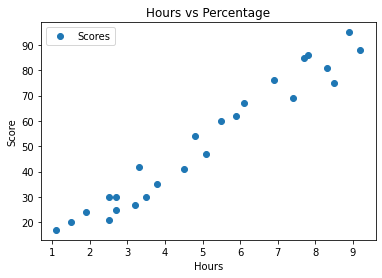

In [5]:

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

From the correlation between hours studied and percentage scores and from the scatter plot of the data, a linear relationship between hours and scores can be observed. So, linear regression will be good to fit to the given data.

#Defining the dependent and independent variables

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


##Train and test splitting of the data

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) 

#Fitting a simple linear regression model to the data

In [8]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting the regression line and for the test data

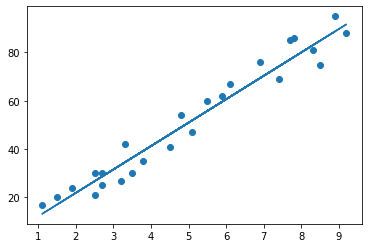

In [9]:

line = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#Visualizing the training set data

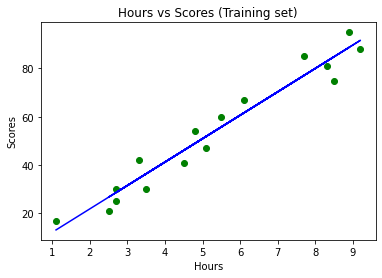

In [10]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Predicting the Test set results

In [11]:
y_pred = model.predict(X_test)

#Compare the predictions with the original data

In [12]:
data1=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
data1

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [13]:
prediction=model.predict([[9.25]])
 
print("Predicted Score = {}".format(prediction[0]))

Predicted Score = 92.14523314523316


#Evaluating the performance of the model

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
 

Mean Absolute Error: 4.691397441397446
